# PRACTICAL 3: To optimize $w$ and $b$ using gradient descent for simple linear regression.

**Problem Statement:**

**Use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. Implement gradient descent algorithm for one feature using these three functions:**
- **compute_gradient** 
- **compute_cost**
- **gradient_descent**

In [3]:
# initializing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# making dataframe for the given training data

df = pd.DataFrame(data = {'Size in feet$^2$':[1000,2000],'Price in \$1000(s)':[300,500]})
df

,Size in feet$^2$,Price in \$1000(s)
0,1000,300
1,2000,500


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fitting linear regression model on the training data

x_train,y_train = np.array(df['Size in feet$^2$']).reshape(-1,1),np.array(df['Price in \\$1000(s)'])
model.fit(x_train,y_train)

LinearRegression()

In [8]:
def Compute_Gradient(x,y,m,w,b):
    dj_dw,dj_db = 0,0
    
    for i in range(0,m):
        dj_dw = dj_dw +  (((w*x[i][0] + b) - y[i])*x[i][0])
        dj_db = dj_db +  ((w*x[i][0] + b) - y[i])
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw,dj_db

In [9]:
# computing the cost function for varying values of w

def Compute_Cost(x,y,m,w,b):
    j=0
    for i in range(0,m):
        j = j +  ((w*x[i][0] + b) - y[i])**2
    j = j/(2*m)
    return j

k=0
J = np.arange(-1,1.41,0.02)

for w in np.arange(-1,1.41,0.02):
    J[k] = Compute_Cost(x_train,y_train,2,w,model.intercept_)
    k=k+1

In [10]:
def Gradient_Descent(x,y,m,w_init,b_init,a):
    w,b = w_init,b_init
    J = Compute_Cost(x,y,m,w,b)
    dJ_dw,dJ_db = Compute_Gradient(x,y,m,w,b)
    w = w - a*dJ_dw
    b = b - a*dJ_db
    return w,b,J

In [27]:
j = np.zeros((50,3))
k=0
W,B,Cost = 0,0,0

for alpha in [0.0000001,0.0000004,0.0000008]:
    w,b=100,100
    for i in range(0,50):
        w,b,J = Gradient_Descent(x_train,y_train,2,w,b,alpha)
        j[i][k]=J
    k=k+1
    if J<0.1:
        W,B,Cost=w,b,J
    print('\nAfter 50 iterations for alpha = {},\nw = {}, b = {}, J = {}'.format(alpha,W,B,Cost))


After 50 iterations for alpha = 1e-07,
w = 0.20009244651382851, b = 99.94012008301269, J = 0.007277832962203829

After 50 iterations for alpha = 4e-07,
w = 0.20003592791808425, b = 99.94012013892144, J = 0.0001792799024822805

After 50 iterations for alpha = 8e-07,
w = 0.20003592791808425, b = 99.94012013892144, J = 0.0001792799024822805


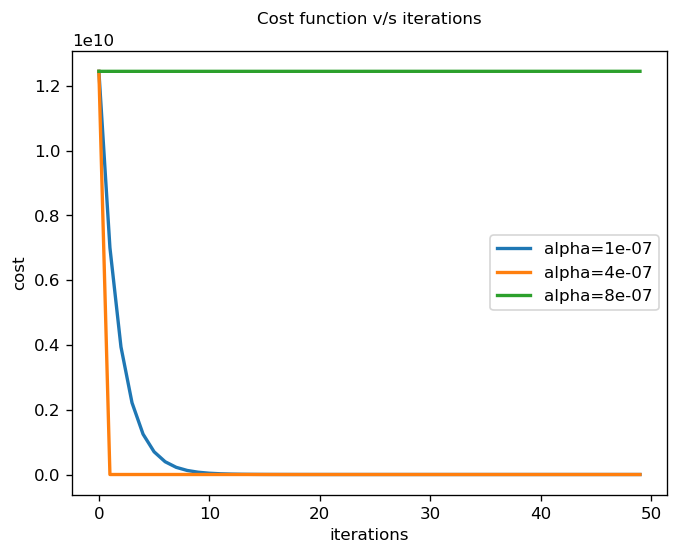

In [28]:
# plotting cost v/s iterations curve

fig,ax = plt.subplots(1,1,dpi=120)
x = range(50)

ax.plot(x,j[:,0],label='alpha=1e-07',lw=2)
ax.plot(x,j[:,1],label='alpha=4e-07',lw=2)
ax.plot(x,j[:,2],label='alpha=8e-07',lw=2)
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('Cost function v/s iterations\n',fontsize=10)
ax.legend()

plt.show()

In [29]:
print('Thus, w converges to {} and b converges to {}\n=> f_wb(x) = {}x + {}'.format(round(W,1),round(B),round(W,1),round(B)))

Thus, w converges to 0.2 and b converges to 100
=> f_wb(x) = 0.2x + 100
